
Gather Sense of Our Data:

The first thing we must do is gather a basic sense of our data. Remember, except for the transaction and amount we dont know what the other columns are (due to privacy reasons). The only thing we know, is that those columns that are unknown have been scaled already.

**Summary:**

1. The transaction amount is relatively small. The mean of all the mounts made is approximately USD 88.
2. There are no "Null" values, so we don't have to work on ways to replace values.
3. Most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occurs (017%) of the time in the dataframe.

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive/Credit_Fraud_Detection/')

In [ ]:
# Reading Dataset 
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
## Check for NuLL Values 
df.isnull().sum().any()

False

In [ ]:
df['Class']==1

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Name: Class, Length: 284807, dtype: bool

In [ ]:
df['Class']==0

0         True
1         True
2         True
3         True
4         True
          ... 
284802    True
284803    True
284804    True
284805    True
284806    True
Name: Class, Length: 284807, dtype: bool

In [ ]:
print('Class - 0 is in percentage',(df['Class'].value_counts()[0]/len(df))*100)

Class - 0 is in percentage 99.82725143693798


In [ ]:
print('Class - 1 is in percentage',(df['Class'].value_counts()[1]/len(df))*100)

Class - 1 is in percentage 0.1727485630620034


** Notice** 

how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

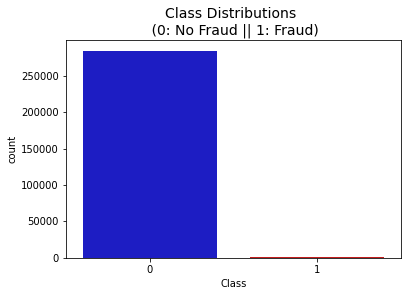

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


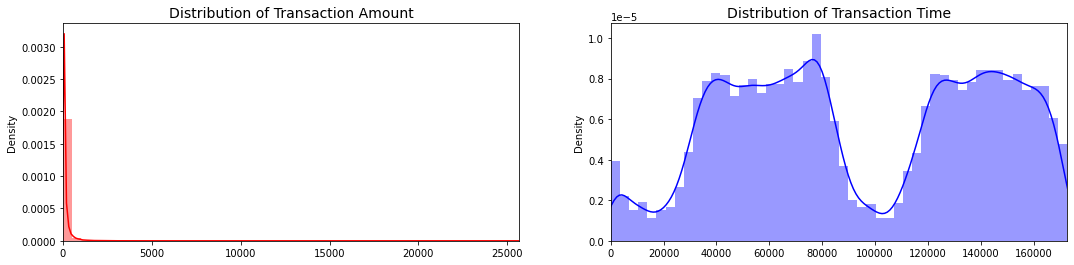

In [ ]:
## Ploting distribution of the feature variables 

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

##### Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [ ]:
# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)


In [ ]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss =StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [ ]:
## Create 5 folds in original data so that 50% goes for training and 50% stays for testing

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


**Random Undersampling**

In this phase of the project we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

In [ ]:
df.sample(frac=1) # shuffle 

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
276662,1.089918,0.969713,1.582588,-1.064544,-0.350888,0.797743,0.317945,3.276444,-1.533627,1.118214,...,-0.206202,0.387410,1.117947,0.149877,-1.754829,-0.575237,-0.450209,0.130338,-0.031884,0
194229,0.670439,0.538035,-0.091015,-0.212357,0.514274,-1.119754,-0.518997,-0.118767,0.131084,-0.159277,...,-0.669162,-0.587527,-1.011527,0.506485,-0.702088,-1.257394,0.210146,-0.024227,0.041568,0
111708,-0.249284,-0.145185,-1.981141,2.802396,0.604675,2.508396,-0.538747,0.085226,-0.309059,1.405468,...,0.287558,-0.370083,-1.298374,0.135088,-0.061744,0.114806,-0.170450,0.153782,0.069744,0
116942,14.616083,-0.119914,-0.818234,-3.375897,-1.246965,0.841012,-0.976942,0.273630,1.469851,-0.298339,...,2.112567,0.623585,-0.435707,-1.056221,-0.126961,0.124604,1.006361,-0.277464,0.163050,0
189110,-0.293579,0.511860,2.108722,-0.062311,-1.379954,0.227641,0.277144,-0.689079,0.166383,-0.271582,...,-0.194830,-0.331601,-0.798771,0.251181,-0.769887,-0.204824,0.247664,-0.067096,-0.067923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68436,-0.293440,-0.372443,1.136907,-0.871173,1.319965,0.320749,-1.124376,1.460106,-1.484509,0.719219,...,-0.229441,-0.123014,0.072705,-0.089947,-0.742322,0.211991,1.197364,0.006926,-0.009661,0
235387,-0.307413,0.748047,-0.625474,1.303970,-0.001461,0.580589,0.372016,-0.411669,0.412633,0.474088,...,-0.216152,0.308786,0.650292,-0.048038,-0.271956,-1.008158,2.250184,-0.026950,0.163204,0
186845,-0.077272,0.500300,-0.631277,1.108012,1.016017,1.238029,-0.167992,0.010531,0.248419,0.412334,...,-0.188825,-0.348024,-0.817763,0.266164,-0.065323,-0.776682,-1.014804,0.030747,0.137577,0
176352,-0.028645,0.446857,2.138597,-1.071155,-0.780144,-1.093694,-0.682027,0.221837,-1.159591,0.139104,...,0.027491,0.348324,1.008934,0.103719,0.255637,-0.121151,-0.108595,0.002395,-0.054992,0


In [ ]:
# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
121,-0.179976,-0.994079,-0.427191,0.745708,1.761811,-0.165130,0.058298,-0.213413,0.647323,0.073464,...,0.052828,-0.201681,-0.432070,0.013164,0.161606,-0.401310,0.047423,0.102549,-0.116571,0
248296,-0.307413,0.812780,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,...,0.354773,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,1
239,-0.027947,-0.993104,1.171439,0.474974,0.011761,1.264303,0.116234,-0.865986,0.554393,-0.276375,...,-0.119439,0.070051,0.278843,-0.097491,0.426278,0.744938,-0.274728,0.008472,0.015492,0
239501,3.007895,0.768888,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,...,-1.928527,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,1
143336,3.226717,0.006967,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,...,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,1


In [ ]:
new_df.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,1.037163,-0.519644,-2.467403,1.905304,-3.083884,2.456780,-1.561726,-0.572584,-2.730903,0.261082,...,0.211179,0.354898,-0.044481,-0.036529,-0.047380,0.087571,0.026120,0.096182,0.027865,0.500000
std,3.355584,0.618052,5.407122,3.596109,6.435905,3.042722,4.202692,1.803657,5.863242,4.850081,...,1.061353,2.787267,1.145080,1.148960,0.586683,0.640419,0.468299,1.003732,0.442955,0.500254
min,-0.307413,-0.994983,-30.552380,-12.114213,-31.103685,-4.515824,-22.105532,-6.406267,-43.557242,-41.044261,...,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.243924,-7.263482,-2.733887,0.000000
25%,-0.282401,-0.993022,-2.788129,0.085200,-5.084967,0.345951,-1.692661,-1.442584,-3.060742,-0.170996,...,-0.166192,-0.173785,-0.533915,-0.226458,-0.415078,-0.216776,-0.296613,-0.039310,-0.049952,0.000000
50%,-0.085097,-0.990484,-0.781327,0.954502,-0.309446,1.383210,-0.390293,-0.510317,-0.433163,0.153493,...,0.052782,0.093024,-0.028825,-0.050720,0.027849,0.127459,-0.015632,0.065185,0.037457,0.500000
75%,0.995424,-0.107259,0.870308,2.726800,0.934280,4.175332,0.427009,0.233236,0.304743,0.808184,...,0.414730,0.713646,0.440345,0.142884,0.393393,0.456121,0.308815,0.455031,0.217936,1.000000
max,53.182981,1.006309,2.132386,22.057729,3.772857,12.114672,11.095089,6.474115,5.802537,20.007208,...,11.059004,27.202839,8.361985,5.466230,1.215279,2.208209,3.065576,3.052358,1.779364,1.000000


Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


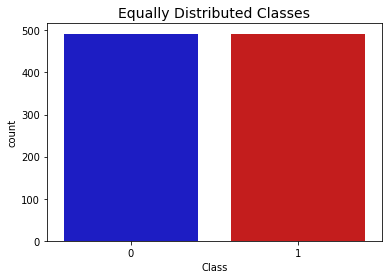

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))



sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()